In [1]:
import json
from pathlib import Path
import torch
from torch.utils.data import DataLoader
import time

In [2]:
path = Path('Ssquad/spoken_train-v1.1.json')

# Open .json file
with open(path,'rb') as f:
    Ssquad_dict = json.load(f)

texts = []
queries = []
answers = []

# Search for each passage, its question and its answer
for group in Ssquad_dict['data']:
    for passage in group['paragraphs']:
        context = passage['context']
        for qa in passage['qas']:
            question = qa['question']
            for answer in qa['answers']:
                # Store every passage, query and its answer to the lists
                texts.append(context)
                queries.append(question)
                answers.append(answer)

train_texts, train_queries, train_answers = texts, queries, answers


In [3]:
path = Path('Ssquad/spoken_test-v1.1.json')

with open(path,'rb') as f:
    Ssquad_dict_test = json.load(f)
    
Texts = []
Queries = []
Answers = []

# Search for each passage, its question and its answer
for group in Ssquad_dict_test['data']:
    for passage in group['paragraphs']:
        context = passage['context']
        for qa in passage['qas']:
            question = qa['question']
            for answer in qa['answers']:
                # Store every passage, query and its answer to the lists
                Texts.append(context)
                Queries.append(question)
                Answers.append(answer)

test_texts, test_queries, test_answers = Texts, Queries, Answers


In [4]:
print(len(train_texts))
print(len(train_queries))
print(len(train_answers))
print(len(test_texts))
print(len(test_queries))
print(len(test_answers))

37111
37111
37111
15875
15875
15875


In [5]:
print("Passage: ",train_texts[0])  
print("Query: ",train_queries[0])
print("Answer: ",train_answers[0])

Passage:  architecturally the school has a catholic character. atop the main building school dome is the golden statue of the virgin mary. immediately in front of the main building in facing it is a copper statue of christ with arms appraised with the legend and the bad meow names. next to the main building is the basilica of the sacred heart. immediately behind the basilica is the grotto im mary in place of prayer and reflection. it is a replica of the grotto at lourdes france where the virgin mary reputedly appeared to st bernadette still burning eighteen fifty eight. at the end of the main drive and in a direct line that connects through three statues in the gold dome is as simple modern stone statue of mary.
Query:  What is in front of the Notre Dame Main Building?
Answer:  {'answer_start': 187, 'text': 'a copper statue of christ'}


In [6]:
print("Passage: ",test_texts[0])  
print("Query: ",test_queries[0])
print("Answer: ",test_answers[0])

Passage:  super bowl fifty was an american football game to determine the champion of the national football league nfl for the twenty fifteen season. the american football conference a f c c champion denver broncos defeated the national football conference n f c c champion carolina panthers twenty four to ten to earn their third super bowl title. the game was played on february seventh twenty sixteen and levis stadium in the san francisco bay area santa clara california. as this was the fiftieth super bowl the league emphasized the golden anniversary with various goldsteins initiatives as well as temporarily suspending the tradition of naming each super bowl game with roman numerals under which they gain would have been known as super bowl l sell that the logo could prominently featured the arabic numerals fifty.
Query:  Which NFL team represented the AFC at Super Bowl 50?
Answer:  {'answer_start': 190, 'text': 'denver broncos'}


In [7]:
print("Answer: ",test_answers[1])

Answer:  {'answer_start': 190, 'text': 'denver broncos'}


In [8]:
print("Answer: ",test_answers[2])

Answer:  {'answer_start': 190, 'text': 'denver broncos'}


In [9]:
print("Answer: ",test_answers[3])

Answer:  {'answer_start': 264, 'text': 'carolina panthers'}


In [10]:
print("Query: ",test_queries[1])

Query:  Which NFL team represented the AFC at Super Bowl 50?


In [11]:
for answer, text in zip(train_answers, train_texts):
    real_answer = answer['text']
    start_idx = answer['answer_start']
    # Get the real end index
    end_idx = start_idx + len(real_answer)

    # Deal with the problem of 1 or 2 more characters 
    if text[start_idx:end_idx] == real_answer:
        answer['answer_end'] = end_idx
    # When the real answer is more by one character
    elif text[start_idx-1:end_idx-1] == real_answer:
        answer['answer_start'] = start_idx - 1
        answer['answer_end'] = end_idx - 1  
    # When the real answer is more by two characters  
    elif text[start_idx-2:end_idx-2] == real_answer:
        answer['answer_start'] = start_idx - 2
        answer['answer_end'] = end_idx - 2    
     

In [12]:
for answer, text in zip(test_answers, test_texts):
    real_answer = answer['text']
    start_idx = answer['answer_start']
    # Get the real end index
    end_idx = start_idx + len(real_answer)

    # Deal with the problem of 1 or 2 more characters 
    if text[start_idx:end_idx] == real_answer:
        answer['answer_end'] = end_idx
    # When the real answer is more by one character
    elif text[start_idx-1:end_idx-1] == real_answer:
        answer['answer_start'] = start_idx - 1
        answer['answer_end'] = end_idx - 1  
    # When the real answer is more by two characters  
    elif text[start_idx-2:end_idx-2] == real_answer:
        answer['answer_start'] = start_idx - 2
        answer['answer_end'] = end_idx - 2   

In [13]:
from transformers import AutoTokenizer,AdamW,BertForQuestionAnswering
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

train_encodings = tokenizer(train_texts, train_queries, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, test_queries, truncation=True, padding=True)
     

2023-04-01 16:15:18.800007: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-01 16:15:29.476908: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /software/spackages/linux-rocky8-x86_64/gcc-9.5.0/anaconda3-2022.05-zyrazrj6uvrtukupqzhaslr63w7hj6in/lib
2023-04-01 16:15:29.480802: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /software/spackag

In [14]:
def add_token_positions(encodings, answers):
    start_positions = []
    end_positions = []

    count = 0

    for i in range(len(answers)):
        start_positions.append(encodings.char_to_token(i, answers[i]['answer_start']))
        end_positions.append(encodings.char_to_token(i, answers[i]['answer_end']))

    # if start position is None, the answer passage has been truncated
        if start_positions[-1] is None:
            start_positions[-1] = tokenizer.model_max_length
      
    # if end position is None, the 'char_to_token' function points to the space after the correct token, so add - 1
        if end_positions[-1] is None:
            end_positions[-1] = encodings.char_to_token(i, answers[i]['answer_end'] - 1)
      # if end position is still None the answer passage has been truncated
            if end_positions[-1] is None:
                count += 1
                end_positions[-1] = tokenizer.model_max_length

    print(count)

  # Update the data in dictionary
    encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

add_token_positions(train_encodings, train_answers)
add_token_positions(test_encodings, test_answers)

1
1


In [15]:
class SquadDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings.input_ids)
     

In [16]:
train_dataset = SquadDataset(train_encodings)
test_dataset = SquadDataset(test_encodings)

In [17]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [19]:
model = BertForQuestionAnswering.from_pretrained('bert-base-uncased').to(device)

optim = AdamW(model.parameters(), lr=5e-5)
# optim = AdamW(model.parameters(), lr=3e-5)
# optim = AdamW(model.parameters(), lr=2e-5)

# epochs = 2
epochs = 3
# epochs = 4
     

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForQuestionAnswering: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased a

In [20]:
whole_train_eval_time = time.time()

train_losses = []
test_losses = []

print_every = 1000

for epoch in range(epochs):
    epoch_time = time.time()

  # Set model in train mode
    model.train()
    
    loss_of_epoch = 0

    print("############Train############")

    for batch_idx,batch in enumerate(train_loader): 
        
        optim.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        start_positions = batch['start_positions'].to(device)
        end_positions = batch['end_positions'].to(device)
    
        outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
        loss = outputs[0]
    # do a backwards pass 
        loss.backward()
    # update the weights
        optim.step()
    # Find the total loss
        loss_of_epoch += loss.item()

        if (batch_idx+1) % print_every == 0:
            print("Batch {:} / {:}".format(batch_idx+1,len(train_loader)),"\nLoss:", round(loss.item(),1),"\n")

    loss_of_epoch /= len(train_loader)
    train_losses.append(loss_of_epoch)

  ##########Evaluation##################

  # Set model in evaluation mode
    model.eval()
    
    print("############Evaluate############")
    
    loss_of_epoch = 0

    for batch_idx,batch in enumerate(test_loader):
        
        with torch.no_grad():
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            start_positions = batch['start_positions'].to(device)
            end_positions = batch['end_positions'].to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
            loss = outputs[0]
      # Find the total loss
            loss_of_epoch += loss.item()

        if (batch_idx+1) % print_every == 0:
            print("Batch {:} / {:}".format(batch_idx+1,len(test_loader)),"\nLoss:", round(loss.item(),1),"\n")

    loss_of_epoch /= len(test_loader)
    test_losses.append(loss_of_epoch)
  
  # Print each epoch's time and train/val loss 
    print("\n-------Epoch ", epoch+1,
        "-------"
        "\nTraining Loss:", train_losses[-1],
        "\nTest Loss:", test_losses[-1],
        "\nTime: ",(time.time() - epoch_time),
        "\n-----------------------",
        "\n\n")

print("Total training and evaluation time: ", (time.time() - whole_train_eval_time))
     

############Train############
Batch 1000 / 4639 
Loss: 2.2 

Batch 2000 / 4639 
Loss: 2.2 

Batch 3000 / 4639 
Loss: 1.4 

Batch 4000 / 4639 
Loss: 1.8 

############Evaluate############
Batch 1000 / 1985 
Loss: 1.2 


-------Epoch  1 -------
Training Loss: 1.846414981801388 
Test Loss: 1.5762094608820054 
Time:  1319.77148103714 
----------------------- 


############Train############
Batch 1000 / 4639 
Loss: 1.1 

Batch 2000 / 4639 
Loss: 1.9 

Batch 3000 / 4639 
Loss: 0.7 

Batch 4000 / 4639 
Loss: 1.7 

############Evaluate############
Batch 1000 / 1985 
Loss: 1.0 


-------Epoch  2 -------
Training Loss: 1.0429207851568618 
Test Loss: 1.5435927471375885 
Time:  1318.8316061496735 
----------------------- 


############Train############
Batch 1000 / 4639 
Loss: 0.6 

Batch 2000 / 4639 
Loss: 0.3 

Batch 3000 / 4639 
Loss: 0.5 

Batch 4000 / 4639 
Loss: 0.5 

############Evaluate############
Batch 1000 / 1985 
Loss: 1.6 


-------Epoch  3 -------
Training Loss: 0.7081887339030805 

In [21]:
# Save model
torch.save(model,"Ssquad/finetunedmodel")

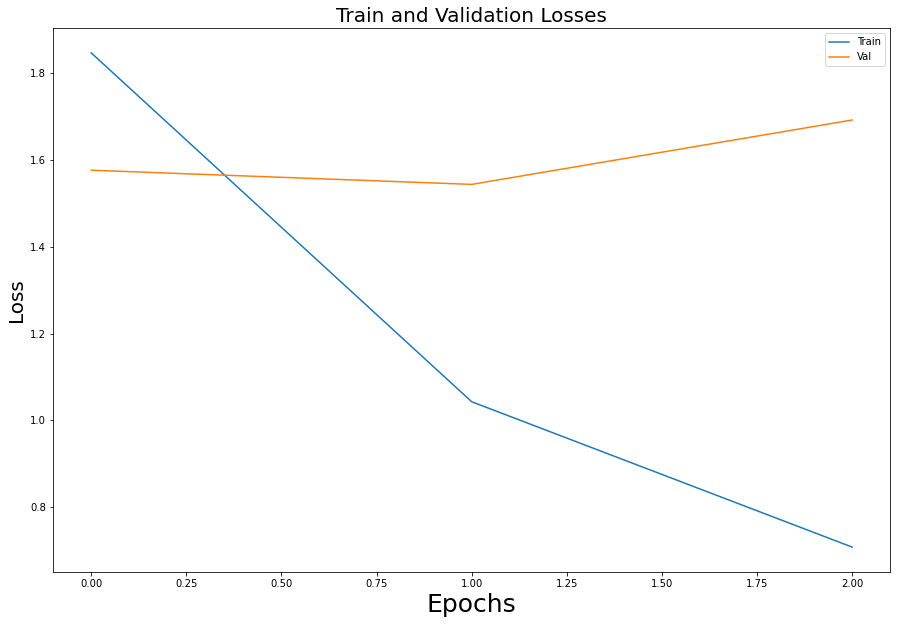

In [22]:
import matplotlib.pyplot as plt 

fig,ax = plt.subplots(1,1,figsize=(15,10))

ax.set_title("Train and Validation Losses",size=20)
ax.set_ylabel('Loss', fontsize = 20) 
ax.set_xlabel('Epochs', fontsize = 25) 
_=ax.plot(train_losses)
_=ax.plot(test_losses)
_=ax.legend(('Train','Val'),loc='upper right')

In [38]:
from accelerate import Accelerator
from transformers import TrainingArguments

In [40]:
fp16_training = False

if fp16_training:
    accelerator = Accelerator(fp16=True)
    device = accelerator.device 


In [43]:
if fp16_training:
    model, optim = accelerator.prepare(model, optim)
    train_loader, test_loader = accelerator.prepare(train_loader, test_loader)

In [45]:
from transformers import get_linear_schedule_with_warmup

In [46]:
num_training_steps = len(train_loader) * epochs
num_warmup_steps = int(num_training_steps * 0.1)  # Warmup for 10% of total training steps

scheduler = get_linear_schedule_with_warmup(
    optim, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps
)

In [47]:
whole_train_eval_time = time.time()

train_losses = []
test_losses = []

print_every = 1000

for epoch in range(epochs):
    epoch_time = time.time()

  # Set model in train mode
    model.train()
    
    loss_of_epoch = 0

    print("############Train############")

    for batch_idx,batch in enumerate(train_loader): 
        
        optim.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        start_positions = batch['start_positions'].to(device)
        end_positions = batch['end_positions'].to(device)
    
        outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
        loss = outputs[0]
     
         # do a backwards pass 
        if fp16_training:
            accelerator.backward(loss)
        else:
            loss.backward()
   
        # update the weights
        optim.step()
        # update the learning rate
        scheduler.step()
        # Find the total loss
        loss_of_epoch += loss.item()

        if (batch_idx+1) % print_every == 0:
            print("Batch {:} / {:}".format(batch_idx+1,len(train_loader)),"\nLoss:", round(loss.item(),1),"\n")

    loss_of_epoch /= len(train_loader)
    train_losses.append(loss_of_epoch)

  ##########Evaluation##################

  # Set model in evaluation mode
    model.eval()
    
    print("############Evaluate############")
    
    loss_of_epoch = 0

    for batch_idx,batch in enumerate(test_loader):
        
        with torch.no_grad():
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            start_positions = batch['start_positions'].to(device)
            end_positions = batch['end_positions'].to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
            loss = outputs[0]
      # Find the total loss
            loss_of_epoch += loss.item()

        if (batch_idx+1) % print_every == 0:
            print("Batch {:} / {:}".format(batch_idx+1,len(test_loader)),"\nLoss:", round(loss.item(),1),"\n")

    loss_of_epoch /= len(test_loader)
    test_losses.append(loss_of_epoch)
  
  # Print each epoch's time and train/val loss 
    print("\n-------Epoch ", epoch+1,
        "-------"
        "\nTraining Loss:", train_losses[-1],
        "\nTest Loss:", test_losses[-1],
        "\nTime: ",(time.time() - epoch_time),
        "\n-----------------------",
        "\n\n")

print("Total training and evaluation time: ", (time.time() - whole_train_eval_time))
     

############Train############
Batch 1000 / 4639 
Loss: 0.1 

Batch 2000 / 4639 
Loss: 0.4 

Batch 3000 / 4639 
Loss: 0.8 

Batch 4000 / 4639 
Loss: 0.3 

############Evaluate############
Batch 1000 / 1985 
Loss: 1.5 


-------Epoch  1 -------
Training Loss: 0.45404024220014116 
Test Loss: 2.047345910955136 
Time:  1319.0831081867218 
----------------------- 


############Train############
Batch 1000 / 4639 
Loss: 0.2 

Batch 2000 / 4639 
Loss: 1.1 

Batch 3000 / 4639 
Loss: 0.2 

Batch 4000 / 4639 
Loss: 0.0 

############Evaluate############
Batch 1000 / 1985 
Loss: 4.0 


-------Epoch  2 -------
Training Loss: 0.2832674126228204 
Test Loss: 2.1702870249673163 
Time:  1319.021495103836 
----------------------- 


############Train############
Batch 1000 / 4639 
Loss: 0.2 

Batch 2000 / 4639 
Loss: 0.3 

Batch 3000 / 4639 
Loss: 0.2 

Batch 4000 / 4639 
Loss: 0.2 

############Evaluate############
Batch 1000 / 1985 
Loss: 4.2 


-------Epoch  3 -------
Training Loss: 0.116822999664891

In [48]:
torch.save(model,"Ssquad/finetunedmodel1")


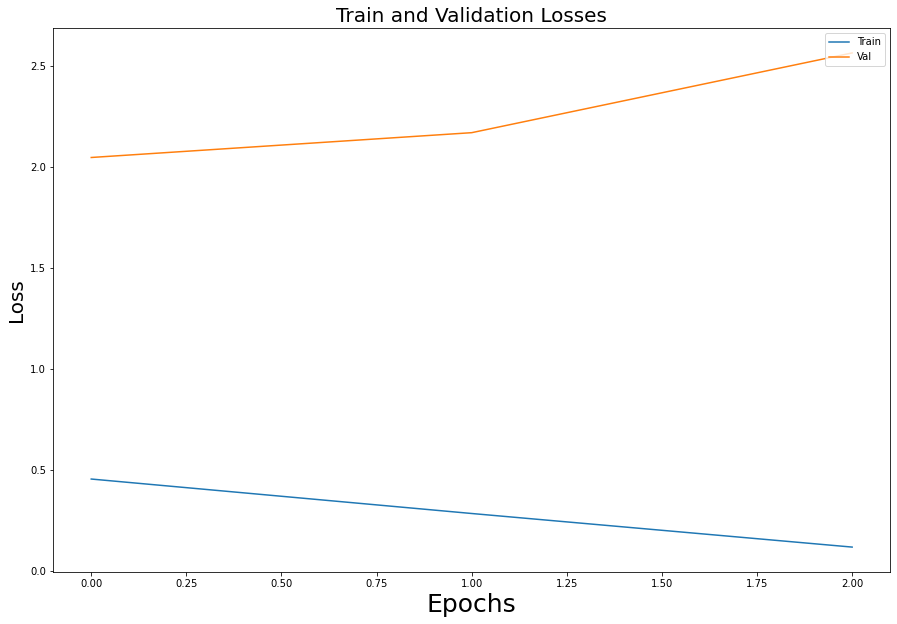

In [49]:
import matplotlib.pyplot as plt 

fig,ax = plt.subplots(1,1,figsize=(15,10))

ax.set_title("Train and Validation Losses",size=20)
ax.set_ylabel('Loss', fontsize = 20) 
ax.set_xlabel('Epochs', fontsize = 25) 
_=ax.plot(train_losses)
_=ax.plot(test_losses)
_=ax.legend(('Train','Val'),loc='upper right')

In [50]:
from transformers import BertTokenizerFast

In [66]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Load the fine-tuned model
model = torch.load("Ssquad/finetunedmodel1")
model.to(device)
model.eval()
#model = torch.load("Ssquad/finetunedmodel",map_location=torch.device('cuda'))
#model.eval()

BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_

In [67]:
import string, re

In [68]:
def predict(context, query, device):
    inputs = tokenizer.encode_plus(query, context, return_tensors='pt')
    inputs = {key: value.to(device) for key, value in inputs.items()}
    outputs = model(**inputs)
    answer_start = torch.argmax(outputs[0])  # get the most likely beginning of answer with the argmax of the score
    answer_end = torch.argmax(outputs[1]) + 1  # get the most likely end of answer with the argmax of the score
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][answer_start:answer_end]))
    return answer

#def predict(context,query):
    
 #   inputs = tokenizer.encode_plus(query, context, return_tensors='pt')
 #   outputs = model(**inputs)
 #   answer_start = torch.argmax(outputs[0])  # get the most likely beginning of answer with the argmax of the score
 #   answer_end = torch.argmax(outputs[1]) + 1 
 #   answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][answer_start:answer_end]))
 #   return answer

def normalize_text(s):
  #Removing articles and punctuation, and standardizing whitespace are all typical text processing steps.
    def remove_articles(text):
        regex = re.compile(r"\b(a|an|the)\b", re.UNICODE)
        return re.sub(regex, " ", text)

    def white_space_fix(text): 
        return " ".join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return "".join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punc(lower(s))))

def compute_exact_match(prediction, truth):
    return int(normalize_text(prediction) == normalize_text(truth))

def compute_f1(prediction, truth):
    pred_tokens = normalize_text(prediction).split()
    truth_tokens = normalize_text(truth).split()
  
  # if either the prediction or the truth is no-answer then f1 = 1 if they agree, 0 otherwise
    if len(pred_tokens) == 0 or len(truth_tokens) == 0:
        return int(pred_tokens == truth_tokens)
  
    common_tokens = set(pred_tokens) & set(truth_tokens)
  
  # if there are no common tokens then f1 = 0
    if len(common_tokens) == 0:
        return 0
  
    prec = len(common_tokens) / len(pred_tokens)
    rec = len(common_tokens) / len(truth_tokens)
    return 2 * (prec * rec) / (prec + rec)

In [71]:
# Load and preprocess the test dataset (assuming you've loaded it into test_texts, test_queries, and test_answers)
#test_encodings = tokenizer(test_texts, test_queries, truncation=True, padding=True)
#add_token_positions(test_encodings, test_answers)
#test_dataset = SquadDataset(test_encodings)
#test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Initialize variables for exact match and F1 scores
total_exact_match = 0
total_f1 = 0
total_samples = len(test_dataset)

# Iterate through the test dataset
for batch in test_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions = batch['start_positions'].to(device)
    end_positions = batch['end_positions'].to(device)
    
    for idx in range(input_ids.shape[0]):
        context = test_texts[idx]
        query = test_queries[idx]
        ground_truth = test_answers[idx]['text']
        
        # Get the predicted answer
        #predicted_answer = predict(context, query)
        predicted_answer = predict(context, query, device)
        
        # Calculate the exact match and F1 scores for the predicted answer and the ground truth answer
        exact_match = compute_exact_match(predicted_answer, ground_truth)
        f1 = compute_f1(predicted_answer, ground_truth)
        
        # Accumulate the exact match and F1 scores
        total_exact_match += exact_match
        total_f1 += f1

# Calculate the average exact match and F1 scores over the entire test dataset
average_exact_match = total_exact_match / total_samples
average_f1 = total_f1 / total_samples

# Print the average exact match and F1 scores
print("Average Exact Match:", average_exact_match)
print("Average F1 Score:", average_f1)


Average Exact Match: 0.5000944881889764
Average F1 Score: 0.5000944881889764


In [72]:
from transformers import get_linear_schedule_with_warmup

num_epochs = 3
num_training_steps = len(train_loader) * num_epochs
warmup_steps = int(0.1 * num_training_steps)  # 10% of training steps for warmup

# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optim, num_warmup_steps=warmup_steps, num_training_steps=num_training_steps)
val_loader = test_loader
# Early stopping
patience = 3
early_stopping_counter = 0
best_validation_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        optim.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        start_positions = batch['start_positions'].to(device)
        end_positions = batch['end_positions'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
        loss = outputs[0]

        if fp16_training:
            accelerator.backward(loss)
        else:
            loss.backward()

        optim.step()
        scheduler.step()
        loss_of_epoch += loss.item()

        if (batch_idx+1) % print_every == 0:
            print("Batch {:} / {:}".format(batch_idx+1,len(train_loader)),"\nLoss:", round(loss.item(),1),"\n")

    loss_of_epoch /= len(train_loader)
    train_losses.append(loss_of_epoch)

    # Validation
    model.eval()
    validation_loss = 0
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        start_positions = batch['start_positions'].to(device)
        end_positions = batch['end_positions'].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
            loss = outputs[0]
            validation_loss += loss.item()

    validation_loss /= len(val_loader)
    print(f"Epoch {epoch+1}, Validation Loss: {validation_loss}")

    # Early stopping
    if validation_loss < best_validation_loss:
        best_validation_loss = validation_loss
        torch.save(model.state_dict(), 'best_model.pt')
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= patience:
        print("Early stopping")
        break


Epoch 1, Validation Loss: 1.69097508922482
Epoch 2, Validation Loss: 1.6913292213899063
Epoch 3, Validation Loss: 1.691458793633831


In [73]:
# Load the best model's weights
model.load_state_dict(torch.load('best_model.pt'))

# Evaluation
model.eval()

# Initialize variables for exact match and F1 scores
total_exact_match = 0
total_f1 = 0
total_samples = len(test_dataset)

# Iterate through the test dataset
for batch in test_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions = batch['start_positions'].to(device)
    end_positions = batch['end_positions'].to(device)
    
    for idx in range(input_ids.shape[0]):
        context = test_texts[idx]
        query = test_queries[idx]
        ground_truth = test_answers[idx]['text']
        
        # Get the predicted answer
        predicted_answer = predict(context, query, device)
        
        # Calculate the exact match and F1 scores for the predicted answer and the ground truth answer
        exact_match = compute_exact_match(predicted_answer, ground_truth)
        f1 = compute_f1(predicted_answer, ground_truth)
        
        # Accumulate the exact match and F1 scores
        total_exact_match += exact_match
        total_f1 += f1

# Calculate the average exact match and F1 scores over the entire test dataset
average_exact_match = total_exact_match / total_samples
average_f1 = total_f1 / total_samples

# Print the average exact match and F1 scores
print("Average Exact Match:", average_exact_match)
print("Average F1 Score:", average_f1)


Average Exact Match: 0.5000944881889764
Average F1 Score: 0.5000944881889764


In [77]:
from transformers import DistilBertTokenizerFast, DistilBertForQuestionAnswering

In [78]:
tokenizer1 = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings1 = tokenizer1(train_texts, train_queries, truncation=True, padding=True)
test_encodings1 = tokenizer1(test_texts, test_queries, truncation=True, padding=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [81]:
add_token_positions(train_encodings1, train_answers)
add_token_positions(test_encodings1, test_answers)
     

1
1


In [82]:
train_dataset1 = SquadDataset(train_encodings1)
test_dataset1 = SquadDataset(test_encodings1)

In [83]:
train_loader1 = DataLoader(train_dataset1, batch_size=8, shuffle=True)
test_loader1 = DataLoader(test_dataset1, batch_size=8, shuffle=True)

In [84]:
device = torch.device('cuda:0' if torch.cuda.is_available()
                      else 'cpu')

In [87]:
model1 = DistilBertForQuestionAnswering.from_pretrained('distilbert-base-uncased').to(device)

optim1 = AdamW(model.parameters(), lr=5e-5)
# optim = AdamW(model.parameters(), lr=3e-5)
# optim = AdamW(model.parameters(), lr=2e-5)

# epochs = 2
epochs = 3
# epochs = 4

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this mode

In [89]:
fp16_training = False

if fp16_training:
    accelerator = Accelerator(fp16=True)
    device = accelerator.device 

In [90]:
if fp16_training:
    model1, optim1 = accelerator.prepare(model1, optim1)
    train_loader1, test_loader1 = accelerator.prepare(train_loader1, test_loader1)

In [91]:
num_training_steps = len(train_loader1) * epochs
num_warmup_steps = int(num_training_steps * 0.1)  # Warmup for 10% of total training steps

scheduler = get_linear_schedule_with_warmup(
    optim1, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps
)

In [93]:
whole_train_eval_time = time.time()

train_losses = []
test_losses = []

print_every = 1000

for epoch in range(epochs):
    epoch_time = time.time()

  # Set model in train mode
    model1.train()
    
    loss_of_epoch = 0

    print("############Train############")

    for batch_idx,batch in enumerate(train_loader1): 
        
        optim1.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        start_positions = batch['start_positions'].to(device)
        end_positions = batch['end_positions'].to(device)
    
        outputs = model1(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
        loss = outputs[0]
     
         # do a backwards pass 
        if fp16_training:
            accelerator.backward(loss)
        else:
            loss.backward()
   
        # update the weights
        optim1.step()
        # update the learning rate
        scheduler.step()
        # Find the total loss
        loss_of_epoch += loss.item()

        if (batch_idx+1) % print_every == 0:
            print("Batch {:} / {:}".format(batch_idx+1,len(train_loader)),"\nLoss:", round(loss.item(),1),"\n")

    loss_of_epoch /= len(train_loader)
    train_losses.append(loss_of_epoch)

  ##########Evaluation##################

  # Set model in evaluation mode
    model1.eval()
    
    print("############Evaluate############")
    
    loss_of_epoch = 0

    for batch_idx,batch in enumerate(test_loader1):
        
        with torch.no_grad():
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            start_positions = batch['start_positions'].to(device)
            end_positions = batch['end_positions'].to(device)
            
            outputs = model1(input_ids, attention_mask=attention_mask, start_positions=start_positions, end_positions=end_positions)
            loss = outputs[0]
      # Find the total loss
            loss_of_epoch += loss.item()

        if (batch_idx+1) % print_every == 0:
            print("Batch {:} / {:}".format(batch_idx+1,len(test_loader)),"\nLoss:", round(loss.item(),1),"\n")

    loss_of_epoch /= len(test_loader)
    test_losses.append(loss_of_epoch)
  
  # Print each epoch's time and train/val loss 
    print("\n-------Epoch ", epoch+1,
        "-------"
        "\nTraining Loss:", train_losses[-1],
        "\nTest Loss:", test_losses[-1],
        "\nTime: ",(time.time() - epoch_time),
        "\n-----------------------",
        "\n\n")

print("Total training and evaluation time: ", (time.time() - whole_train_eval_time))
     

############Train############
Batch 1000 / 4639 
Loss: 6.2 

Batch 2000 / 4639 
Loss: 6.2 

Batch 3000 / 4639 
Loss: 6.2 

Batch 4000 / 4639 
Loss: 6.1 

############Evaluate############
Batch 1000 / 1985 
Loss: 6.1 


-------Epoch  1 -------
Training Loss: 6.179448968147661 
Test Loss: 6.173168792772653 
Time:  701.3036885261536 
----------------------- 


############Train############
Batch 1000 / 4639 
Loss: 6.2 

Batch 2000 / 4639 
Loss: 6.2 

Batch 3000 / 4639 
Loss: 6.2 

Batch 4000 / 4639 
Loss: 6.2 

############Evaluate############
Batch 1000 / 1985 
Loss: 6.1 


-------Epoch  2 -------
Training Loss: 6.178841545345917 
Test Loss: 6.1731714577758945 
Time:  701.4519121646881 
----------------------- 


############Train############
Batch 1000 / 4639 
Loss: 6.1 

Batch 2000 / 4639 
Loss: 6.2 

Batch 3000 / 4639 
Loss: 6.3 

Batch 4000 / 4639 
Loss: 6.0 

############Evaluate############
Batch 1000 / 1985 
Loss: 6.2 


-------Epoch  3 -------
Training Loss: 6.179606007614843 
Te

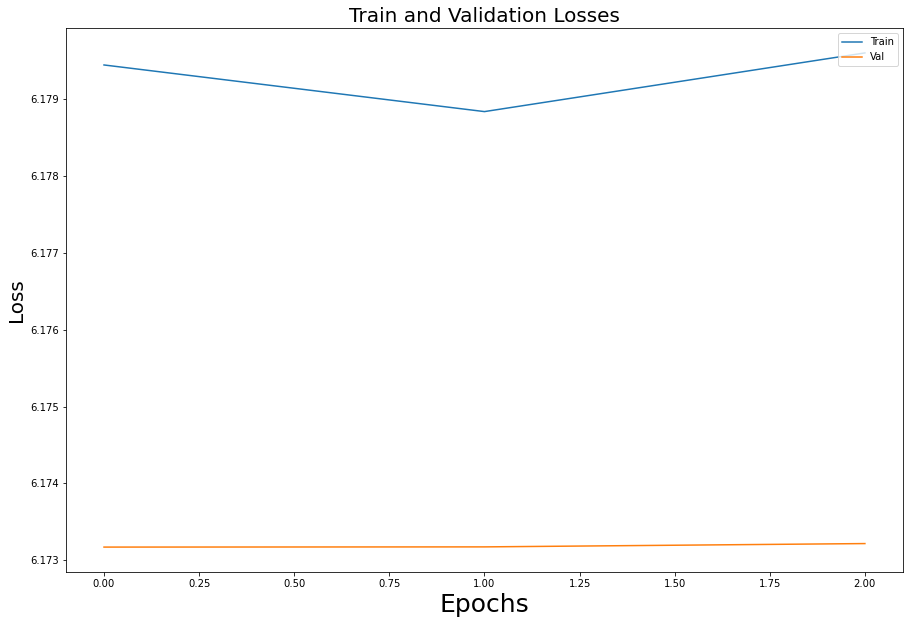

In [94]:
import matplotlib.pyplot as plt 

fig,ax = plt.subplots(1,1,figsize=(15,10))

ax.set_title("Train and Validation Losses",size=20)
ax.set_ylabel('Loss', fontsize = 20) 
ax.set_xlabel('Epochs', fontsize = 25) 
_=ax.plot(train_losses)
_=ax.plot(test_losses)
_=ax.legend(('Train','Val'),loc='upper right')

In [95]:
torch.save(model1,"Ssquad/finetunedmodel2")

In [96]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Load the fine-tuned model
model = torch.load("Ssquad/finetunedmodel2")
model.to(device)
model.eval()

DistilBertForQuestionAnswering(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            

In [97]:
total_exact_match = 0
total_f1 = 0
total_samples = len(test_dataset1)

# Iterate through the test dataset
for batch in test_loader1:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    start_positions = batch['start_positions'].to(device)
    end_positions = batch['end_positions'].to(device)
    
    for idx in range(input_ids.shape[0]):
        context = test_texts[idx]
        query = test_queries[idx]
        ground_truth = test_answers[idx]['text']
        
        # Get the predicted answer
        #predicted_answer = predict(context, query)
        predicted_answer = predict(context, query, device)
        
        # Calculate the exact match and F1 scores for the predicted answer and the ground truth answer
        exact_match = compute_exact_match(predicted_answer, ground_truth)
        f1 = compute_f1(predicted_answer, ground_truth)
        
        # Accumulate the exact match and F1 scores
        total_exact_match += exact_match
        total_f1 += f1

# Calculate the average exact match and F1 scores over the entire test dataset
average_exact_match = total_exact_match / total_samples
average_f1 = total_f1 / total_samples

# Print the average exact match and F1 scores
print("Average Exact Match:", average_exact_match)
print("Average F1 Score:", average_f1)

Average Exact Match: 0.0
Average F1 Score: 0.03536462983450097


In [60]:
def give_an_answer(context,query,answer):
    prediction = predict(context,query,device)
    em_score = compute_exact_match(prediction, answer)
    f1_score = compute_f1(prediction, answer)

    print(f"Question: {query}")
    print(f"Prediction: {prediction}")
    print(f"True Answer: {answer}")
    print(f"EM: {em_score}")
    print(f"F1: {f1_score}")
    print("\n")


In [61]:
context = "Hi! My name is Alexa and I am 21 years old. I used to live in Peristeri of Athens, but now I moved on in Kaisariani of Athens."

queries = ["How old is Alexa?",
           "Where does Alexa live now?",
           "Where Alexa used to live?"
          ]
answers = ["21",
           "Kaisariani of Athens",
           "Peristeri of Athens"
          ]

for q,a in zip(queries,answers):
    give_an_answer(context,q,a)
     

Question: How old is Alexa?
Prediction: 21
True Answer: 21
EM: 1
F1: 1.0


Question: Where does Alexa live now?
Prediction: peristeri of athens,
True Answer: Kaisariani of Athens
EM: 0
F1: 0.6666666666666666


Question: Where Alexa used to live?
Prediction: alexa
True Answer: Peristeri of Athens
EM: 0
F1: 0




In [63]:
context = test_texts[0]
queries = test_queries[0]
answers = test_answers[0]

In [64]:
for q,a in zip(queries,answers):
    give_an_answer(context,q,a)

Question: W
Prediction: 
True Answer: answer_start
EM: 0
F1: 0


Question: h
Prediction: 
True Answer: text
EM: 0
F1: 0


Question: i
Prediction: 
True Answer: answer_end
EM: 0
F1: 0




In [65]:
test_texts[0]

'super bowl fifty was an american football game to determine the champion of the national football league nfl for the twenty fifteen season. the american football conference a f c c champion denver broncos defeated the national football conference n f c c champion carolina panthers twenty four to ten to earn their third super bowl title. the game was played on february seventh twenty sixteen and levis stadium in the san francisco bay area santa clara california. as this was the fiftieth super bowl the league emphasized the golden anniversary with various goldsteins initiatives as well as temporarily suspending the tradition of naming each super bowl game with roman numerals under which they gain would have been known as super bowl l sell that the logo could prominently featured the arabic numerals fifty.'